In [1]:
import math
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date, time

### Missing planets or celestial bodies

    *Pluto
    *Moon
    *Neptune

    *Chiron
    *Ceres
    *Juno
    *Lillith
    *Nodes

### Universal Epoch date in astronomy - J2000 (Julian years)

In [2]:
# Celestial coordinates at epoch 01.01.2000 @ 00:00 UT
df ={'Planet':['Mercury','Venus','Earth','Mars','Jupiter','Saturn'],'λi':[250.2,181.2,100.0,355.2,34.3,50.1],'T_(Days)':[87.969,224.701,365.256,686.980,4332.59,10759.2],'ω0':[4.09235,1.60213,0.98561,0.52403,0.08308,0.03346],'λp':[77.5,131.6,102.9,336.1,14.3,93.1],'e':[0.2056,0.0068,0.0167,0.0934,0.0485,0.0555], 'a (A.U.)':[0.387,0.723,1.0,1.52,5.2,9.55]}

In [3]:
df = pd.DataFrame(data=df)

In [4]:
df

,Planet,λi,T_(Days),ω0,λp,e,a (A.U.)
0,Mercury,250.2,87.969,4.09235,77.5,0.2056,0.387
1,Venus,181.2,224.701,1.60213,131.6,0.0068,0.723
2,Earth,100.0,365.256,0.98561,102.9,0.0167,1.000
3,Mars,355.2,686.980,0.52403,336.1,0.0934,1.520
4,Jupiter,34.3,4332.590,0.08308,14.3,0.0485,5.200
5,Saturn,50.1,10759.200,0.03346,93.1,0.0555,9.550


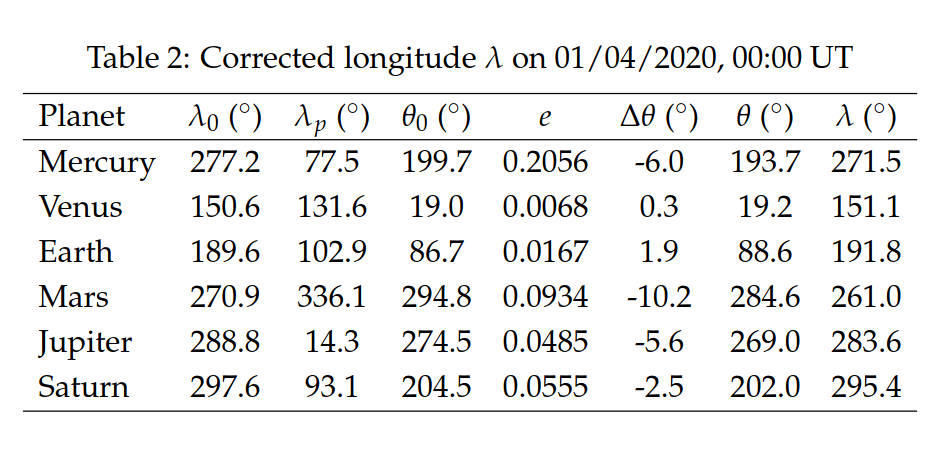

In [5]:
from IPython.display import Image
Image(filename='img/Screenshot_20200622_172846.png') 

### Get days since epoch and user dob

In [6]:
def get_usr_dob():
    # Enter day, month and year in numerical form (1/4/2020)
    day = int(input("Please enter your day of birth: "))
    month = int(input("Please enter your month of birth: "))
    year = int(input("Please enter your year of birth: "))
    # (1230)
    t = int(input("Please enter your time of birth in HHMM format: "))
    usr_time = time(t)
    usr_dob = date(year, month, day)
    usr_data = datetime.combine(usr_dob, usr_time)
    return usr_data

In [7]:
# 1 4 2020 0000
usr_data = get_usr_dob()

Please enter your day of birth: 1
Please enter your month of birth: 4
Please enter your year of birth: 2020
Please enter your time of birth in HHMM format: 0000


In [8]:
def get_yrs_since_epoch(usr_data):
    # Define epoch time
    d = date(2000,1,1)
    t = time(0, 0)
    j2000 = datetime.combine(d,t)
    if j2000 > usr_data:
        yrs_since_epoch = j2000 - usr_data
    else:
        yrs_since_epoch = usr_data - j2000
    return round(yrs_since_epoch.days / 365.25,2)

In [9]:
get_yrs_since_epoch(usr_data)

20.25

In [10]:
def get_days_since_epoch(usr_data):
    # Convert 01.01.2000 @ 00:00 UT to datetime
    d = date(2000,1,1)
    t = time(0, 0)
    j2000 = datetime.combine(d,t)
    # Does the calculation change for dates before j2000? 
    if j2000 > usr_data:
        yrs_since_epoch = j2000 - usr_data
    else:
        yrs_since_epoch = usr_data - j2000
    # convert datetime epoch to int
    days_since_epoch = yrs_since_epoch.days
    return days_since_epoch

### Calculate heliocentric longitude 

In [11]:
days_since_epoch = get_days_since_epoch(usr_data)
days_since_epoch

7396

In [12]:
years_since_epoch = get_yrs_since_epoch(usr_data)
years_since_epoch

20.25

In [13]:
def helio_longitude(df, days_since_epoch):
    'Calculate heliocentric longitude for a each planet in dataframe for a given date'
    # Circular orbit
    init_mean_long = df["λi"]
    angle_trav_per_day = df["ω0"]
    mean_ang_traversed = angle_trav_per_day * days_since_epoch
    mean_long = init_mean_long + mean_ang_traversed
    helio_mean_long = round(mean_long % 360,2)
    # Convert circular to heliocentric orbit
    perihelion_long = df["λp"]
    eccentricity = df["e"]
    mean_anomaly = helio_mean_long - perihelion_long
    helio_ellip = math.degrees(2*eccentricity*(math.sin(math.radians(mean_anomaly)))) + math.degrees((1.25 * eccentricity**2*math.sin(math.radians(2*mean_anomaly))))
    frac_of_year = round(days_since_epoch / 365.25,2)
    prec_vern_eqnx = round(frac_of_year * 360/25800,2)
    geo_longitude = helio_mean_long + helio_ellip + prec_vern_eqnx
    return geo_longitude

In [14]:
#df['λ (helio)'] = round(df.apply(helio_longitude,axis=1,args=(days_since_epoch,)),1)

### Fix mean anomaly calc to extract Anomaly

In [15]:
def get_mean_anomoly(df):
    init_mean_long = df["λi"]
    angle_trav_per_day = df["ω0"]
    mean_ang_traversed = angle_trav_per_day * days_since_epoch
    mean_long = init_mean_long + mean_ang_traversed
    helio_mean_long = round(mean_long % 360,2)
    # Convert circular to heliocentric orbit
    perihelion_long = df["λp"]
    eccentricity = df["e"]
    mean_anomaly = round(helio_mean_long - perihelion_long,1)
    return mean_anomaly

In [16]:
# Mean anomoly is slightly off θ(◦) see table 2 
df['θ0(◦) mean anomoly'] = df.apply(get_mean_anomoly,axis=1)

In [17]:
def get_delta_anomaly(df):
    Delta_anomaly_1 = round(math.degrees(2*df['e']*(math.sin(math.radians(df['θ0(◦) mean anomoly'])))),1) 
    Delta_anomaly_2 = round(math.degrees(1.25 * df['e']**2*math.sin(math.radians(2*df['θ0(◦) mean anomoly']))),1)
    total_correction = Delta_anomaly_1 + Delta_anomaly_2
    return total_correction

In [18]:
df['Total_Delta (◦)'] = df.apply(get_delta_anomaly,axis=1)

In [19]:
def get_anomaly(df):
    Anomaly_θ = df['θ0(◦) mean anomoly'] + df['Total_Delta (◦)']
    return Anomaly_θ

In [20]:
df['Anomaly_θ (◦)'] = df.apply(get_anomaly,axis=1)

In [21]:
def get_helio_mean_long(df, days_since_epoch):
    'Calculate mean heliocentric longitude (considering each planets orbit to be circular) for a each planet in dataframe for a given date'
    angle_trav_per_day = df["ω0"]
    mean_ang_traversed = angle_trav_per_day * days_since_epoch
    mean_long = df["λi"] + mean_ang_traversed
    helio_mean_long = round(mean_long % 360,2)
    return helio_mean_long

In [22]:
df['λ0 (helio)'] = df.apply(get_helio_mean_long, args=(days_since_epoch,),axis=1)

In [23]:
def get_helio_final_long(df, days_since_epoch):
    'Calculate heliocentric longitude for a each planet in dataframe for a given date'
    # Convert circular to heliocentric orbit
    frac_of_year = round(days_since_epoch / 365.25,2)
    prec_vern_eqnx = round(frac_of_year * 360/25800,2)
    geo_longitude = df['λ0 (helio)'] + df['Total_Delta (◦)'] + prec_vern_eqnx
    return geo_longitude

In [24]:
df['λ Helio'] = df.apply(get_helio_final_long, axis=1, args=(days_since_epoch,))

In [25]:
# Everything is fine except for Mars mean anomaly for some reason?? 0_o
df

,Planet,λi,T_(Days),ω0,λp,e,a (A.U.),θ0(◦) mean anomoly,Total_Delta (◦),Anomaly_θ (◦),λ0 (helio),λ Helio
0,Mercury,250.2,87.969,4.09235,77.5,0.2056,0.387,199.7,-6.0,193.7,277.22,271.50
1,Venus,181.2,224.701,1.60213,131.6,0.0068,0.723,19.0,0.3,19.3,150.55,151.13
2,Earth,100.0,365.256,0.98561,102.9,0.0167,1.000,86.7,1.9,88.6,189.57,191.75
3,Mars,355.2,686.980,0.52403,336.1,0.0934,1.520,-65.2,-10.2,-75.4,270.93,261.01
4,Jupiter,34.3,4332.590,0.08308,14.3,0.0485,5.200,274.5,-5.5,269.0,288.76,283.54
5,Saturn,50.1,10759.200,0.03346,93.1,0.0555,9.550,204.5,-2.4,202.1,297.57,295.45


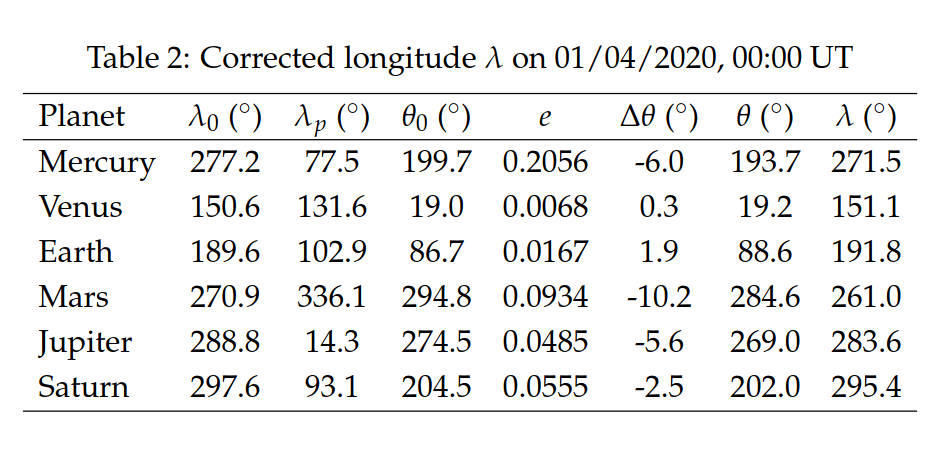

In [26]:
from IPython.display import Image
Image(filename='img/Screenshot_20200622_172846.png') 

### Convert Heliocentric into Geocentric longitude

1. Calculate radii, r, of planet's orbit around the sun, for that epoch, giving their positions in polar form ((r, λ)

### r A.U. formula is slightly off, 0.463 for mercury

In [27]:
def helio_to_geo_long(df):
    r = df['a (A.U.)']*(1-(df['e']**2))/1+(df['e']*(math.cos(df['θ0(◦) mean anomoly'])))
    return r

In [28]:
df['r(A.U)'] = df.apply(helio_to_geo_long,axis=1)

In [29]:
# Distance r(A.U) from planet to sun is slightly off, should be 0.463 for Mercury, 0.999 for Earth
df

,Planet,λi,T_(Days),ω0,λp,e,a (A.U.),θ0(◦) mean anomoly,Total_Delta (◦),Anomaly_θ (◦),λ0 (helio),λ Helio,r(A.U)
0,Mercury,250.2,87.969,4.09235,77.5,0.2056,0.387,199.7,-6.0,193.7,277.22,271.50,0.413272
1,Venus,181.2,224.701,1.60213,131.6,0.0068,0.723,19.0,0.3,19.3,150.55,151.13,0.729690
2,Earth,100.0,365.256,0.98561,102.9,0.0167,1.000,86.7,1.9,88.6,189.57,191.75,1.004755
3,Mars,355.2,686.980,0.52403,336.1,0.0934,1.520,-65.2,-10.2,-75.4,270.93,261.01,1.439912
4,Jupiter,34.3,4332.590,0.08308,14.3,0.0485,5.200,274.5,-5.5,269.0,288.76,283.54,5.169358
5,Saturn,50.1,10759.200,0.03346,93.1,0.0555,9.550,204.5,-2.4,202.1,297.57,295.45,9.467505


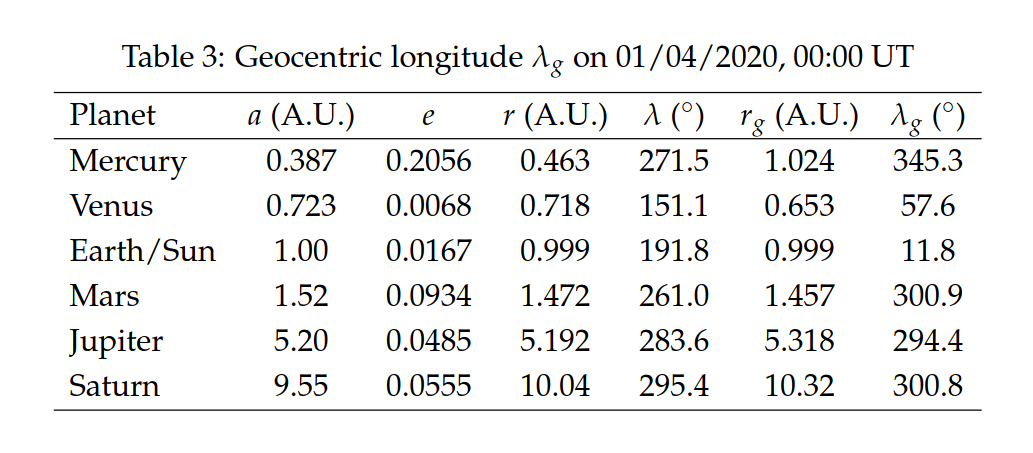

In [30]:
from IPython.display import Image
Image(filename='img/Screenshot_20200622_194743.png') 

In [31]:
# round to 3 decimal place
# mercury
# Xh=rcos(λ) =0.012 A.U.
# Yh=rsin(λ) =−0.463 A.U
0.463 * math.cos(math.radians(271.5))

0.012119927066545253

In [32]:
# -0.463
0.463 * math.sin(math.radians(271.5))

-0.46284134146368305

In [33]:
# X0=−0.978 A.U.
# Y0=−0.204 A.U.
# earth
0.999 * math.cos(math.radians(191.8))

-0.9778885213729233

In [34]:
0.999 * math.sin(math.radians(191.8))

-0.2042915557899485

### xH, yH planet coordinates, x0, y0 earth coordinates

In [35]:
df['Xh'] = df.apply(lambda x: x['r(A.U)'] * math.cos(math.radians(x['λ Helio'])),axis=1)
df['Yh'] = df.apply(lambda x: x['r(A.U)'] * math.sin(math.radians(x['λ Helio'])),axis=1)

In [36]:
x0 = df.loc[df.Planet == 'Earth', "Xh"].iloc[0]
y0 = df.loc[df.Planet == 'Earth', "Yh"].iloc[0]

In [37]:
print("x0: ",x0, " y0: ",y0 )

x0:  -0.983700980336424  y0:  -0.20461009816596945


In [38]:
df['xG'] = df['Xh'] - x0
df['yG'] = df['Yh'] - y0

### xG, yG Subtract Earth 

In [39]:
df['rG (A.U.)'] = df.apply(lambda x: math.sqrt((x['xG']**2) + (x['yG']**2)), axis=1)

In [40]:
df.apply(lambda x: math.sqrt((x['xG']**2) + (x['yG']**2)), axis=1)

0    1.016144
1    0.654965
2    0.000000
3    1.434644
4    5.296817
5    9.754437
dtype: float64

In [41]:
df2 = df[['Planet','xG','yG']]
df2

,Planet,xG,yG
0,Mercury,0.994519,-0.208521
1,Venus,0.344699,0.556922
2,Earth,0.000000,0.000000
3,Mars,0.758697,-1.217613
4,Jupiter,2.193973,-4.821074
5,Saturn,5.052108,-8.344174


In [42]:
df2['Inv Tan xG/yG'] = df2.apply(lambda x: math.degrees(math.atan2(x['yG'],x['xG'])),axis=1)
df2

/home/linda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Planet,xG,yG,Inv Tan xG/yG
0,Mercury,0.994519,-0.208521,-11.841659
1,Venus,0.344699,0.556922,58.245144
2,Earth,0.000000,0.000000,0.000000
3,Mars,0.758697,-1.217613,-58.072880
4,Jupiter,2.193973,-4.821074,-65.530687
5,Saturn,5.052108,-8.344174,-58.806548


In [43]:
360 + (-65.8)

294.2

In [44]:
df.columns

Index(['Planet', 'λi', 'T_(Days)', 'ω0', 'λp', 'e', 'a (A.U.)',
       'θ0(◦) mean anomoly', 'Total_Delta (◦)', 'Anomaly_θ (◦)', 'λ0 (helio)',
       'λ Helio', 'r(A.U)', 'Xh', 'Yh', 'xG', 'yG', 'rG (A.U.)'],
      dtype='object')

In [45]:
converter = lambda x: 360+x if x < 0 else (x)

In [46]:
df2['Inv Tan xG/yG'].apply(converter)

0    348.158341
1     58.245144
2      0.000000
3    301.927120
4    294.469313
5    301.193452
Name: Inv Tan xG/yG, dtype: float64

In [47]:
df2['λg'] = df2['Inv Tan xG/yG'].apply(converter)

/home/linda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df2

,Planet,xG,yG,Inv Tan xG/yG,λg
0,Mercury,0.994519,-0.208521,-11.841659,348.158341
1,Venus,0.344699,0.556922,58.245144,58.245144
2,Earth,0.000000,0.000000,0.000000,0.000000
3,Mars,0.758697,-1.217613,-58.072880,301.927120
4,Jupiter,2.193973,-4.821074,-65.530687,294.469313
5,Saturn,5.052108,-8.344174,-58.806548,301.193452


### What is right ascension, declination?

### How to find positions of other planets for J2000

## Plot planet position on circle

In [49]:
import matplotlib.pyplot as plt

### How to account for the fact that 0 degrees on natal astrology chart needs to start at 180 degrees on standard chart 

348.1583405526207
58.245144493710185
0.0
301.92712012598366
294.4693125417341
301.19345213273544


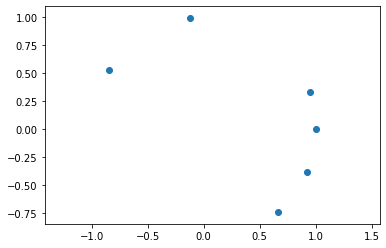

In [63]:
import random
import math
import matplotlib.pyplot as plt


def circle():
    x = []
    y = []
    for i in df2['λg']:
        print(i)
        x.append(math.cos(i));
        y.append(math.sin(i));
    plt.axes().set_aspect('equal', 'datalim')  # before `plt.show()`
    plt.scatter(x,y)
    plt.show()
circle()

348.1583405526207
58.245144493710185
0.0
301.92712012598366
294.4693125417341
301.19345213273544


/home/linda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


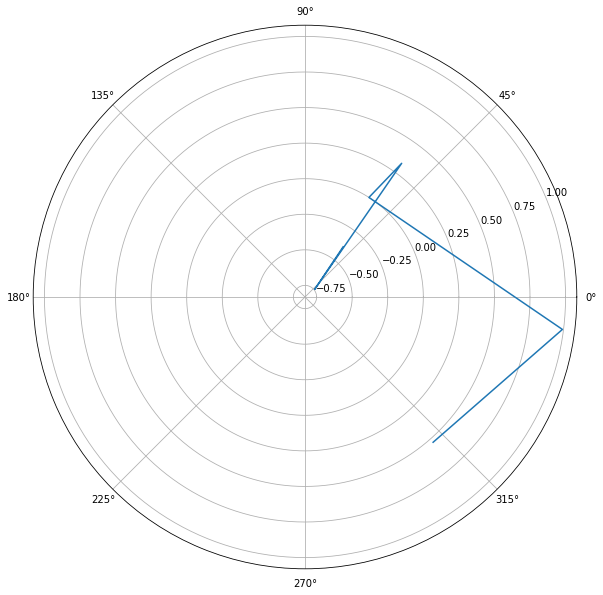

In [64]:
def circle():
    plt.figure(figsize=(20,10))
    x = []
    y = []
    for i in df2['λg']:
        print(i)
        x.append(math.cos(i));
        y.append(math.sin(i));
#     plt.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*5, color='r', linestyle='-')
    plt.subplot(111, projection='polar')
#     plt.axes().set_aspect('equal', 'datalim')  # before `plt.show()`
    plt.plot(x,y)
    plt.show()
circle()

In [175]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))

r = np.arange(356,300,56,60,321)
theta = 2 * np.pi * r
# Compute pie slices

ax = plt.subplot(111, projection='polar') # lambert
ax.plot(theta, r)

# bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
# for r, bar in zip(radii, bars):
#     bar.set_facecolor(plt.cm.viridis(r / 10.))
#     bar.set_alpha(0.5)

plt.show()


TypeError: arange() takes at most 4 arguments (5 given)

<Figure size 1440x720 with 0 Axes>

In [160]:
r = np.arange(0, 2, 0.01)

In [162]:
df2.columns

Index(['Planet', 'xG', 'yG', 'Inv Tan xG/yG', 'λg'], dtype='object')

In [170]:
r = df2['λg'].array
r

<PandasArray>
[ 348.1583405526207, 58.245144493710185,                0.0,
 301.92712012598366,  294.4693125417341, 301.19345213273544]
Length: 6, dtype: float64

In [181]:
import turtle
window = turtle.Screen()
turtle.bgcolor("yellow")
window.exitonclick()

## Start react native app